## 회귀 모델 연습문제

### 회귀 모델 예측 작업
- 아래 프로세스로 모델링 진행
- (1) 데이터 준비 : 보스턴 주택 가격 데이터 : boston_dataset.csv
- (2) 전처리 : 피처 스케일링 수행  
- (3) 모델링   
      - 회귀 모델   
      - loss='mean_squared_error'  
      - metrics=['mean_absolute_error']  
      - loss, mean_absolute_error = model.evaluate(X_test, y_test)    
- (4) 실제가격과 예측가격 비교 : 20건 (실체 수치로 비교)
- (5) 모델 저장 / 불러오기 
- (6) 시각화 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from keras.utils import to_categorical

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

### (1) 데이터 로드

In [5]:
boston_df = df_pop = pd.read_csv('./data/boston_dataset.csv', index_col=0) 
boston_df.head(1)
boston_df.tail(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24.0


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
505,0.04741,0.0,11.93,0,0.573,6.03,80.8,2.505,1,273,21.0,396.9,7.88,11.9


In [6]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


### (2) 피처 / 타깃 설정 

In [7]:
# 타깃값 데이터 세트
target = boston_df['PRICE']
# 피처값 데이터 세트
features = boston_df.drop('PRICE', axis=1)

### (3) 피처 스케일링 

In [8]:
scaler = StandardScaler()
features_sc = scaler.fit_transform(features)

### (4) 훈련 / 테스트 데이터셋 분리

In [9]:

X_train , X_test , y_train , y_test = train_test_split(features_sc,
                                                       target,
                                                       test_size=0.3, 
                                                       random_state=156)

### (4) 모델 생성 / 평가 

In [16]:
# 회귀 모델 
# - loss='mean_squared_error'
# - metrics=['mean_absolute_error']
# - loss, mean_absolute_error = model.evaluate(X_test, y_test)

tf.random.set_seed(3)
model = Sequential()
# model.add(Dense(42, input_shape=(13, ), activation="relu"))
model.add(Dense(42, input_shape=(13, )))
model.add(Dense(1)) # 회귀문제이므로 출력층에 activation을 사용할 필요 없음

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_absolute_error"])

epochs = 100
batch_size = 32 # 기본값이고 이걸 배수로 늘려가는게 일반적이다

history = model.fit(X_train, y_train,
                    epochs = epochs,
                    batch_size = batch_size,
                    validation_data=(X_test, y_test))
loss, mean_abs = model.evaluate(X_test, y_test)

Epoch 1/100


C:\Users\82108\anaconda3\envs\DLenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 606.4658 - mean_absolute_error: 22.6793 - val_loss: 534.2455 - val_mean_absolute_error: 21.5853
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 596.5120 - mean_absolute_error: 22.6053 - val_loss: 523.1990 - val_mean_absolute_error: 21.4814
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 587.4254 - mean_absolute_error: 22.5363 - val_loss: 512.6399 - val_mean_absolute_error: 21.3733
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 578.6817 - mean_absolute_error: 22.4615 - val_loss: 502.2972 - val_mean_absolute_error: 21.2576
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 570.0403 - mean_absolute_error: 22.3779 - val_loss: 491.9817 - val_mean_absolute_error: 21.1316
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 561.3507 - mean_absolute_error: 22.2834 - val_loss: 481.6037 - val_mean_absolute_error: 20.9932
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 552.5389 - mean_absolu

In [17]:
print(f'mean_absolute_error : {mean_abs:.4f}, loss : {loss :.4f}')
# mean_absolute_error : 2.7533, loss : 12.9317

mean_absolute_error : 3.1387, loss : 16.7900


### (5) 시각화 

<Figure size 1800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'mean_absolute_error')

<Axes: >

Text(0.5, 1.0, 'loss')

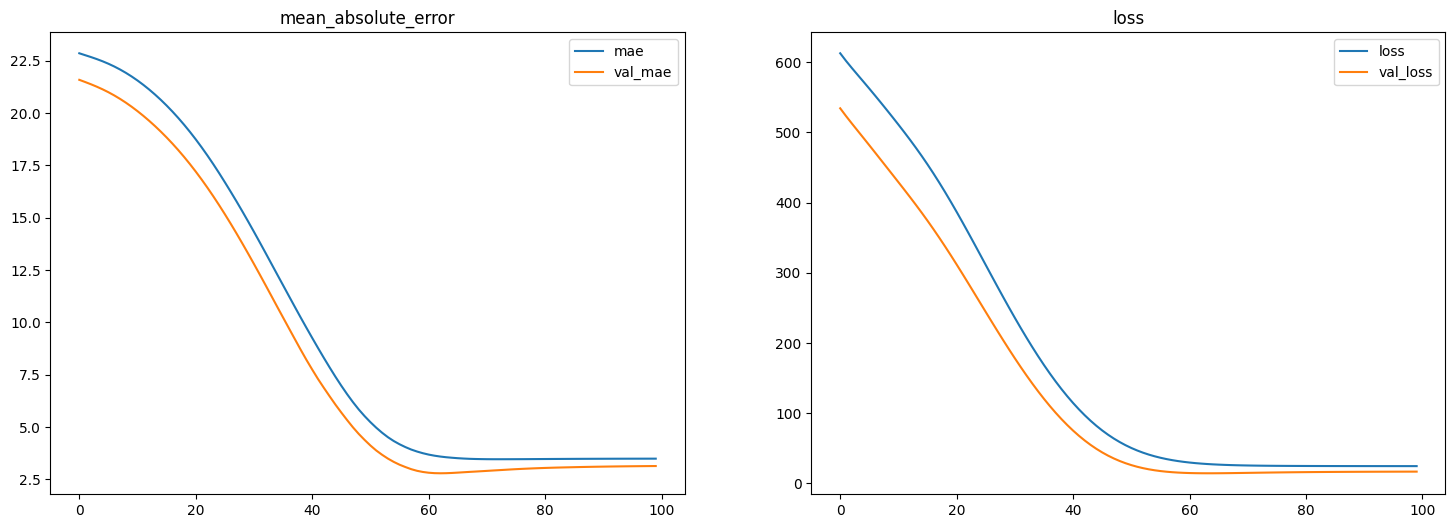

In [18]:
plt. figure(figsize=(18, 6))

# 평균 절대 오차 (MAE)
plt.subplot(1, 2, 1)
plt.plot(history.history["mean_absolute_error"], label="mae")
plt.plot(history.history["val_mean_absolute_error"], label="val_mae")

plt.title('mean_absolute_error')
plt.legend()

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.title('loss')
plt.legend()

plt.show()

### (6) 모델 저장 / 로드 
- boston_house_model.keras 로 저장

In [19]:
# model.save("/model/boston_house_model.h5")
model.save("./model/boston_house_model.keras")

In [22]:
# 모델 읽어오기
loaded_model = load_model("./model/boston_house_model.keras")
loaded_model

<Sequential name=sequential_2, built=True>

### (7) 예측 
- 실제값과 예측값 비교

In [25]:
y_pred = loaded_model.predict(X_test, verbose=True)
y_pred_top20 = y_pred[:20].reshape(1, -1)[0].round(1)
y_pred_top20

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


array([23. , 19.5, 36.3, 19.9, 32.3, 17.6, 30.7, 17.8, 10.9, 12.9, 21. ,
       17.2, 28.5, 36.6, 23.6, 24.3, 14.6, 11.5, 30.5, 22.1],
      dtype=float32)

In [26]:
# 실제 테스트 타겟 값
y_test.values[:20]

array([21.7, 19.9, 36.5, 12.5, 29. , 18.1, 24.1, 20. ,  9.7, 12.7, 16.7,
       18.6, 23.3, 48.3, 19.4, 23.1, 10.4, 12.7, 24. , 20.3])

In [27]:
price_pred_df = pd.DataFrame({'예측가격': y_pred_top20, '실제가격': y_test.values[:20]})
price_pred_df

,예측가격,실제가격
0,23.000000,21.7
1,19.500000,19.9
2,36.299999,36.5
3,19.900000,12.5
4,32.299999,29.0
5,17.600000,18.1
6,30.700001,24.1
7,17.799999,20.0
8,10.900000,9.7
9,12.900000,12.7


### (8) 평가 지표 출력하고 머신러닝 LinearRegression과 비교

In [28]:
# MSE / RMSE R제곱 
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE : {mse:.3F}, RMSE : {rmse:.3f}")
print(f"R제곱 : {r2:.3F}")

# MSE : 12.932, RMSE : 3.596
# R제곱 : 0.818

MSE : 16.790, RMSE : 4.098
R제곱 : 0.764


- 일반 선형회귀에 적용했을때보단 성능이 떨어짐
- 데이터 양 문제로 딥러닝(은닉층에 활성화 함수를 사용하지 않은) 에서는 제대로 학습이 안되어 잇는 모델일 수 있음
    - MSE : 16.790, RMSE : 4.098
    - R제곱 : 0.764